# Presets

The original data creators, depositors or copyright holders, the funders of the
Data Collections (if different) and the UK Data Service/UK Data Archive, and to acknowledge
Crown Copyright where appropriate. The original data creators, depositors or copyright holders, the funders of the Data Collections (if
different) and the UK Data Service/UK Data Archive bear no responsibility for their further
analysis or interpretation.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.io as pio
pio.renderers.default = "browser"

pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('data/data_p2.csv')

# Basic stats

In [3]:
data.head()

,id,inactive,account_type,registration_time,area_name,business_type,start_balance,n_transactions_sent,n_transactions_received,n_penalties,n_bonuses,n_partners_received,n_partners_sent,first_trx_date,last_trx_date,n_transactions,n_partners,registration_date,days_before_first_trx,days_from_registr,count_intensity,count_sent_intensity,count_received_intensity,days_past_last_trxs,is_stage_2,n_partners_received_stage_2,n_partners_sent_stage_2,n_partners_stage_2,stage_2_partners_share
0,33064,1,individual,2020-08-10 13:28:13.820557,Kinango Kwale,food,0.0,4.0,6.0,0.0,4.0,2.0,2.0,2020-08-10,2020-08-19,10.0,4.0,2020-08-10,0,81.797387,0.122253,0.048901,0.073352,6307200000000000,1,1.0,1.0,2.0,0.50
1,34782,0,individual,2020-08-19 11:13:07.797863,Mukuru Nairobi,shop,0.0,3.0,4.0,1.0,3.0,2.0,3.0,2020-08-19,2020-10-20,7.0,5.0,2020-08-19,0,72.891207,0.096034,0.041157,0.054876,950400000000000,1,1.0,2.0,3.0,0.60
2,30712,1,individual,2020-07-28 07:37:13.403603,Kinango Kwale,farming,0.0,5.0,6.0,1.0,5.0,2.0,3.0,2020-07-28,2020-10-20,11.0,5.0,2020-07-28,0,95.041142,0.115739,0.052609,0.063131,950400000000000,1,1.0,2.0,3.0,0.60
3,35689,0,individual,2020-08-24 12:27:00.324002,Kinango Kwale,food,0.0,3.0,4.0,0.0,3.0,2.0,2.0,2020-08-24,2020-09-07,7.0,4.0,2020-08-24,0,67.839904,0.103184,0.044222,0.058962,4665600000000000,1,1.0,2.0,3.0,0.75
4,40015,0,individual,2020-10-09 09:29:44.204909,Kinango Kwale,farming,0.0,2.0,3.0,0.0,2.0,2.0,2.0,2020-10-09,2020-10-17,5.0,4.0,2020-10-09,0,21.963008,0.227656,0.091062,0.136593,1209600000000000,1,0.0,1.0,1.0,0.25


In [4]:
print('Nrows:', data.shape[0])
print('Ncols:', data.shape[1])
print('rows/cols ratio:', data.shape[0]/data.shape[1])

Nrows: 5151
Ncols: 29
rows/cols ratio: 177.6206896551724


In [5]:
print(data.dtypes.to_string())

id                               int64
inactive                         int64
account_type                    object
registration_time               object
area_name                       object
business_type                   object
start_balance                  float64
n_transactions_sent            float64
n_transactions_received        float64
n_penalties                    float64
n_bonuses                      float64
n_partners_received            float64
n_partners_sent                float64
first_trx_date                  object
last_trx_date                   object
n_transactions                 float64
n_partners                     float64
registration_date               object
days_before_first_trx            int64
days_from_registr              float64
count_intensity                float64
count_sent_intensity           float64
count_received_intensity       float64
days_past_last_trxs              int64
is_stage_2                       int64
n_partners_received_stage

In [6]:
print('Number of integer columns:', len(data.dtypes[data.dtypes == 'int64']))
print('Number of float columns:', len(data.dtypes[data.dtypes == 'float64']))
print('Number of string columns:', len(data.dtypes[data.dtypes == 'object']))

Number of integer columns: 5
Number of float columns: 17
Number of string columns: 7


In [7]:
print(data.isna().sum().to_string())

id                             0
inactive                       0
account_type                   0
registration_time              0
area_name                      0
business_type                  0
start_balance                  0
n_transactions_sent            0
n_transactions_received        0
n_penalties                    0
n_bonuses                      0
n_partners_received            0
n_partners_sent                0
first_trx_date                 0
last_trx_date                  0
n_transactions                 0
n_partners                     0
registration_date              0
days_before_first_trx          0
days_from_registr              0
count_intensity                0
count_sent_intensity           0
count_received_intensity       0
days_past_last_trxs            0
is_stage_2                     0
n_partners_received_stage_2    0
n_partners_sent_stage_2        0
n_partners_stage_2             0
stage_2_partners_share         0


- how to replace NA for dates? 

In [8]:
data.describe()

,id,inactive,start_balance,n_transactions_sent,n_transactions_received,n_penalties,n_bonuses,n_partners_received,n_partners_sent,n_transactions,n_partners,days_before_first_trx,days_from_registr,count_intensity,count_sent_intensity,count_received_intensity,days_past_last_trxs,is_stage_2,n_partners_received_stage_2,n_partners_sent_stage_2,n_partners_stage_2,stage_2_partners_share
count,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000,5.151000e+03,5151.000000,5151.000000,5151.000000,5151.000000,5.151000e+03,5151.000000,5151.000000,5151.000000,5151.000000,5151.000000
mean,27860.734421,0.469618,265.756452,25.904096,33.488061,0.435838,6.885071,10.449816,8.254514,59.383227,18.696952,-7.629668e+15,132.593319,0.411132,0.179906,0.231561,3.726421e+15,0.973986,4.427490,4.390410,8.817899,0.389368
std,11020.318384,0.499125,5139.352738,76.203706,89.918368,0.555737,10.500522,26.410305,19.857694,163.305599,44.814543,3.148492e+17,122.229933,0.876169,0.422519,0.464371,5.468429e+16,0.159193,11.951266,9.880312,20.904328,0.248421
min,0.000000,0.000000,-248.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.223372e+18,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20454.500000,0.000000,0.000000,3.000000,4.000000,0.000000,3.000000,2.000000,2.000000,7.000000,4.000000,0.000000e+00,62.902220,0.095756,0.038038,0.054965,9.504000e+14,1.000000,0.000000,1.000000,1.000000,0.200000
50%,31670.000000,0.000000,0.000000,4.000000,6.000000,0.000000,4.000000,2.000000,3.000000,10.000000,5.000000,0.000000e+00,90.840932,0.140201,0.055694,0.082393,1.036800e+15,1.000000,1.000000,1.000000,2.000000,0.400000
75%,36430.000000,1.000000,0.000000,16.000000,26.000000,1.000000,8.000000,10.000000,7.000000,42.000000,17.000000,6.912000e+14,170.733328,0.347844,0.129845,0.213376,2.505600e+15,1.000000,3.000000,3.000000,6.000000,0.600000
max,40821.000000,1.000000,347203.998315,1469.000000,1774.000000,10.000000,404.000000,1014.000000,911.000000,3028.000000,1925.000000,6.264000e+16,740.706922,15.993784,7.894781,8.099003,1.604102e+18,1.000000,338.000000,271.000000,562.000000,1.000000


In [9]:
data.select_dtypes(['object']).apply(lambda x: x.unique())

account_type                                              [individual]
registration_time    [2020-08-10 13:28:13.820557, 2020-08-19 11:13:...
area_name            [Kinango Kwale, Mukuru Nairobi, Nyanza, Misc N...
business_type        [food, shop, farming, labour, fuel/energy, wat...
first_trx_date       [2020-08-10, 2020-08-19, 2020-07-28, 2020-08-2...
last_trx_date        [2020-08-19, 2020-10-20, 2020-09-07, 2020-10-1...
registration_date    [2020-08-10, 2020-08-19, 2020-07-28, 2020-08-2...
dtype: object

In [10]:
data.select_dtypes(['int64']).apply(lambda x: x.unique())

id                       [33064, 34782, 30712, 35689, 40015, 4722, 4055...
inactive                                                            [1, 0]
days_before_first_trx    [0, 30240000000000000, 172800000000000, 129600...
days_past_last_trxs      [6307200000000000, 950400000000000, 4665600000...
is_stage_2                                                          [1, 0]
dtype: object

# EDA

In [11]:
def show_basic_plots(df, vars_subset=None):
    # Presets:
    if vars_subset is None:
        vars_subset = df.columns.tolist()
    
    color_background = '#F5F5F5'
    color_gridlines = '#DCDCDC'
    colors_in_use = ['#2C3E50', '#537EA2', '#858F84', '#42A593',
                     '#873E23', '#CFD1A1', '#6A744F', '#BDBDC5',
                     '#7EA253', '#EDB676', '#C26D40']+px.colors.qualitative.Safe
    
    dtypes_num = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
    dtypes_str = ['object', 'category']
    vars_num = df.loc[:, vars_subset].select_dtypes(include=dtypes_num).columns
    vars_str = df.loc[:, vars_subset].select_dtypes(include=dtypes_str).columns
    
    # For categorical variables:
    fig_str_lst = [None]*len(vars_str)
    for i in range(0, len(vars_str)):
        fig = go.Figure()
        fig.add_trace(go.Histogram(x=df.loc[:, vars_str[i]],
                                   name=vars_str[i],
                                   showlegend=True))
        fig.update_traces(marker_color=colors_in_use[0],
                          marker_line_color='rgb(8,48,107)',
                          marker_line_width=1.5,
                          opacity=0.8)
        fig.update_layout(xaxis_type='category',
                          xaxis_title=vars_str[i],
                          paper_bgcolor=color_background,
                          plot_bgcolor=color_background)
        fig.update_yaxes(gridcolor=color_gridlines)
        fig.update_xaxes(linecolor=color_gridlines)
        fig_str_lst[i] = fig
        
    # For 2 categorical variables:
    fig_str_lst_mix = []
    for i in range(0, len(vars_str)):
        for j in range(0, len(vars_str)):
            if i == j:
                continue
            else:
                fig = px.histogram(df, x=vars_str[i], color=vars_str[j],
                                   color_discrete_sequence=colors_in_use[1:])
                fig.update_traces(marker_line_color='rgb(8,48,107)',
                                  marker_line_width=1.5,
                                  opacity=0.8)
                fig.update_layout(xaxis_type='category',
                                  xaxis_title=vars_str[i],
                                  paper_bgcolor=color_background,
                                  plot_bgcolor=color_background)
                fig.update_yaxes(gridcolor=color_gridlines, title='')
                fig.update_xaxes(linecolor=color_gridlines)
                fig_str_lst_mix.append(fig)
            
    # For numerical variables:
    fig_num_lst_dist = [None]*len(vars_num)
    for i in range(0, len(vars_num)):
        fig = ff.create_distplot(hist_data=[df[vars_num[i]].dropna()],
                                 group_labels=[vars_num[i]],
                                 show_hist=False,
                                 show_rug=False,
                                 colors = colors_in_use)
        fig.update_layout(paper_bgcolor=color_background,
                              plot_bgcolor=color_background)
        fig.update_yaxes(gridcolor=color_gridlines,
                         zerolinecolor=color_gridlines,
                         title='')
        fig.update_xaxes(gridcolor=color_gridlines,
                         title=vars_num[i])
        fig_num_lst_dist[i] = fig
        
    fig_num_lst_violin = [None]*len(vars_num)
    for i in range(0, len(vars_num)):
        fig = px.violin(df, y=vars_num[i], box=True, points='outliers')
        fig.update_traces(marker_color = colors_in_use[0],
                          opacity=0.8,
                          name=vars_num[i],
                          showlegend=True)
        fig.update_layout(paper_bgcolor=color_background,
                          plot_bgcolor=color_background)
        fig.update_yaxes(gridcolor=color_gridlines,
                         zerolinecolor=color_gridlines,
                         title='')
        fig.update_xaxes(title=vars_num[i])
        fig_num_lst_violin[i] = fig
    
        # For 2 numerical variables:
    fig_num_lst_mix = []
    fig_num_lst_scat = []
    for i in range(0, len(vars_num)):
        for j in range(0, len(vars_num)):
            if i == j:
                continue
            else:
                fig = go.Figure()
                fig.add_trace(go.Histogram2dContour(x = df[vars_num[i]],
                                                        y = df[vars_num[j]],
                                                        colorscale='deep'))
                fig.update_layout(paper_bgcolor=color_background,
                                  plot_bgcolor=color_background)
                fig.update_yaxes(title=vars_num[j])
                fig.update_xaxes(title=vars_num[i])
                fig_num_lst_mix.append(fig)
                
                fig = px.scatter(data,x=data[vars_num[i]],
                                 y=data[vars_num[j]],
                                 trendline='ols')
                fig.update_layout(paper_bgcolor=color_background,
                                  plot_bgcolor=color_background)
                fig.update_traces(marker_color=colors_in_use[0],
                                  opacity=0.8)
                fig.update_yaxes(gridcolor=color_gridlines,
                                 zerolinecolor=color_gridlines,
                                 title=vars_num[j])
                fig.update_xaxes(gridcolor=color_gridlines,
                                 zerolinecolor=color_gridlines,
                                 title=vars_num[i])
                fig_num_lst_scat.append(fig)
        
    # 1 categorical, 1 numeric:
    fig_all_violin_mix = []
    for i in range(0, len(vars_str)):
        for j in range(0, len(vars_num)):
            fig = px.violin(df, y=vars_num[j], color=vars_str[i],
                            color_discrete_sequence=colors_in_use,
                            box=True, points='outliers')
            fig.update_traces(opacity=0.8)
            fig.update_layout(xaxis_title=vars_num[j],
                              showlegend=True,
                              paper_bgcolor=color_background,
                              plot_bgcolor=color_background)
            fig.update_yaxes(gridcolor=color_gridlines, title='')
            fig.update_xaxes(linecolor=color_gridlines)
            fig_all_violin_mix.append(fig)
            
    final_dict = {
        # categorical+target
        'dist_cat': fig_str_lst,
        'dist_mlt_cat': fig_str_lst_mix,
        # numeric+target
        'dist_num': fig_num_lst_dist,
        'violin_num': fig_num_lst_violin,
        'scatter_num': fig_num_lst_scat,
        'dist_mlt_num': fig_num_lst_mix,
        # all
        'violin_mix': fig_all_violin_mix
        #'scatter_mix': None,
        #'dist_mlt_mix': None,
    }
    return(final_dict)

In [12]:
def corr_heatmap(df):
    color_background = '#F5F5F5'
    color_gridlines = '#DCDCDC'
        
    fig = px.imshow(df.corr().round(3), text_auto=True, color_continuous_scale='deep')
    fig.update_traces(opacity=0.8)
    fig.update_layout(
        coloraxis_showscale=False,
        paper_bgcolor=color_background,
        plot_bgcolor=color_background)
    fig.update_yaxes(gridcolor=color_gridlines, title='')
    fig.update_xaxes(linecolor=color_gridlines)
    return(fig)

def show_violin(df):
    plts = show_basic_plots(df)
    for i in plts['violin_mix']: 
        i.show()
        
def show_dist_cat(df):
    plts = show_basic_plots(df)
    for i in plts['dist_cat']: 
        i.show()
        
def show_dummy_corr(df):
    corr_heatmap(
        pd.get_dummies(
            df,
            columns=tmp_cols_to_dummy,
            prefix=tmp_cols_to_dummy
        )
    ).show()

In [13]:
def show_outliers(X, n_std=3):
    outliers_dict = {}
    
    for col in X.columns.to_list():
        mean = X[col].mean()
        sd = X[col].std()
        X_filtered = X[X[col] > mean+(n_std*sd)]
        outliers_dict[col] = [
            X.shape[0]-X[(X[col] <= mean+(n_std*sd))].shape[0],
            round((X.shape[0]-X[(X[col] <= mean+(n_std*sd))].shape[0])/X.shape[0],3),
            X_filtered[col].min()
        ]
        
    return(pd.DataFrame(outliers_dict, index=['Count', 'Percentage', 'Min']))

## Numerical

In [39]:
cols_num = [
    'inactive', 'start_balance',
    'n_transactions_sent', 'n_transactions_received', 'n_transactions',
    'n_penalties', 'n_bonuses',
    'n_partners_received', 'n_partners_sent', 'n_partners', 
    'days_before_first_trx', 'days_from_registr', 'days_past_last_trxs',
    'count_intensity', 'count_sent_intensity', 'count_received_intensity',
    'is_stage_2', 'stage_2_partners_share',
    'n_partners_received_stage_2', 'n_partners_sent_stage_2', 'n_partners_stage_2'
]
data_num = data.loc[:, cols_num]
data_num['inactive'] = data_num['inactive'].astype(str)
tmp = show_basic_plots(data_num)

In [29]:
#for i in tmp['dist_num']:
    #i.show()

In [42]:
for i in tmp['violin_num']:
    i.show()

- start balance: better 0-1 (was or not)
- n transactions: too many outliers, rather not make distinction between sent/received
- n partners, count intensity, n_partners_stage_2, n bonuses: the same story as with n transactions

- n penalties: more than 1 - outliers
- is stage 2: almost all in stage 2! change condition for stage 2

- days before 1st trx: outliers when no trxs was held
- days from registr: just interesting distrib :)
- days past las trx: the same story as with days before 1st trx, but positive outliers

- stage_2_share: some concentrations around ~5 different values

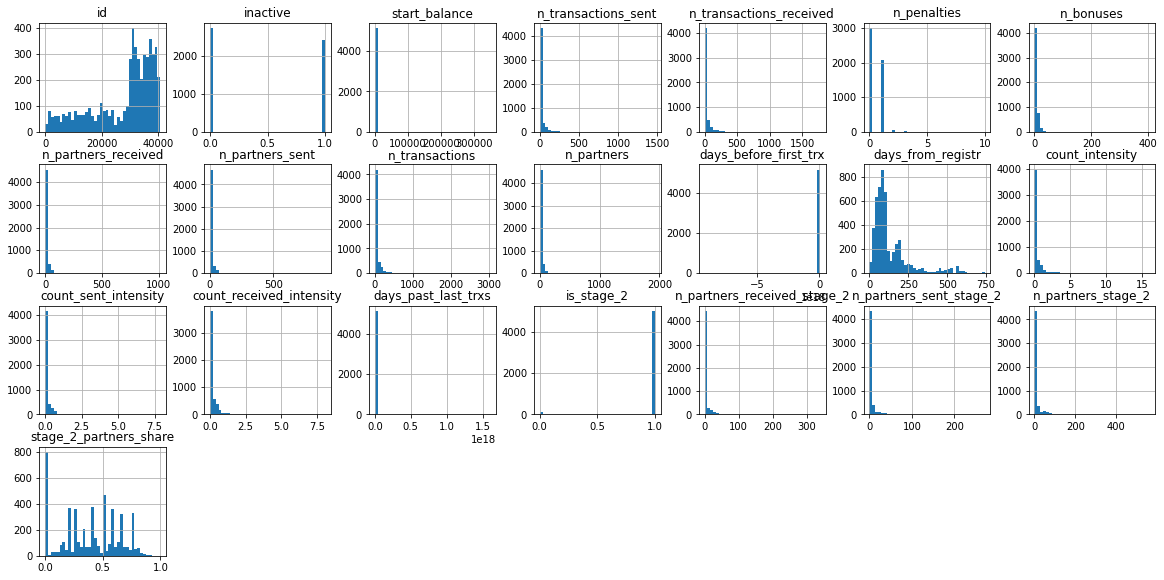

In [17]:
data.hist(layout=(6, 7), figsize=(20, 15), bins=40)
plt.show()

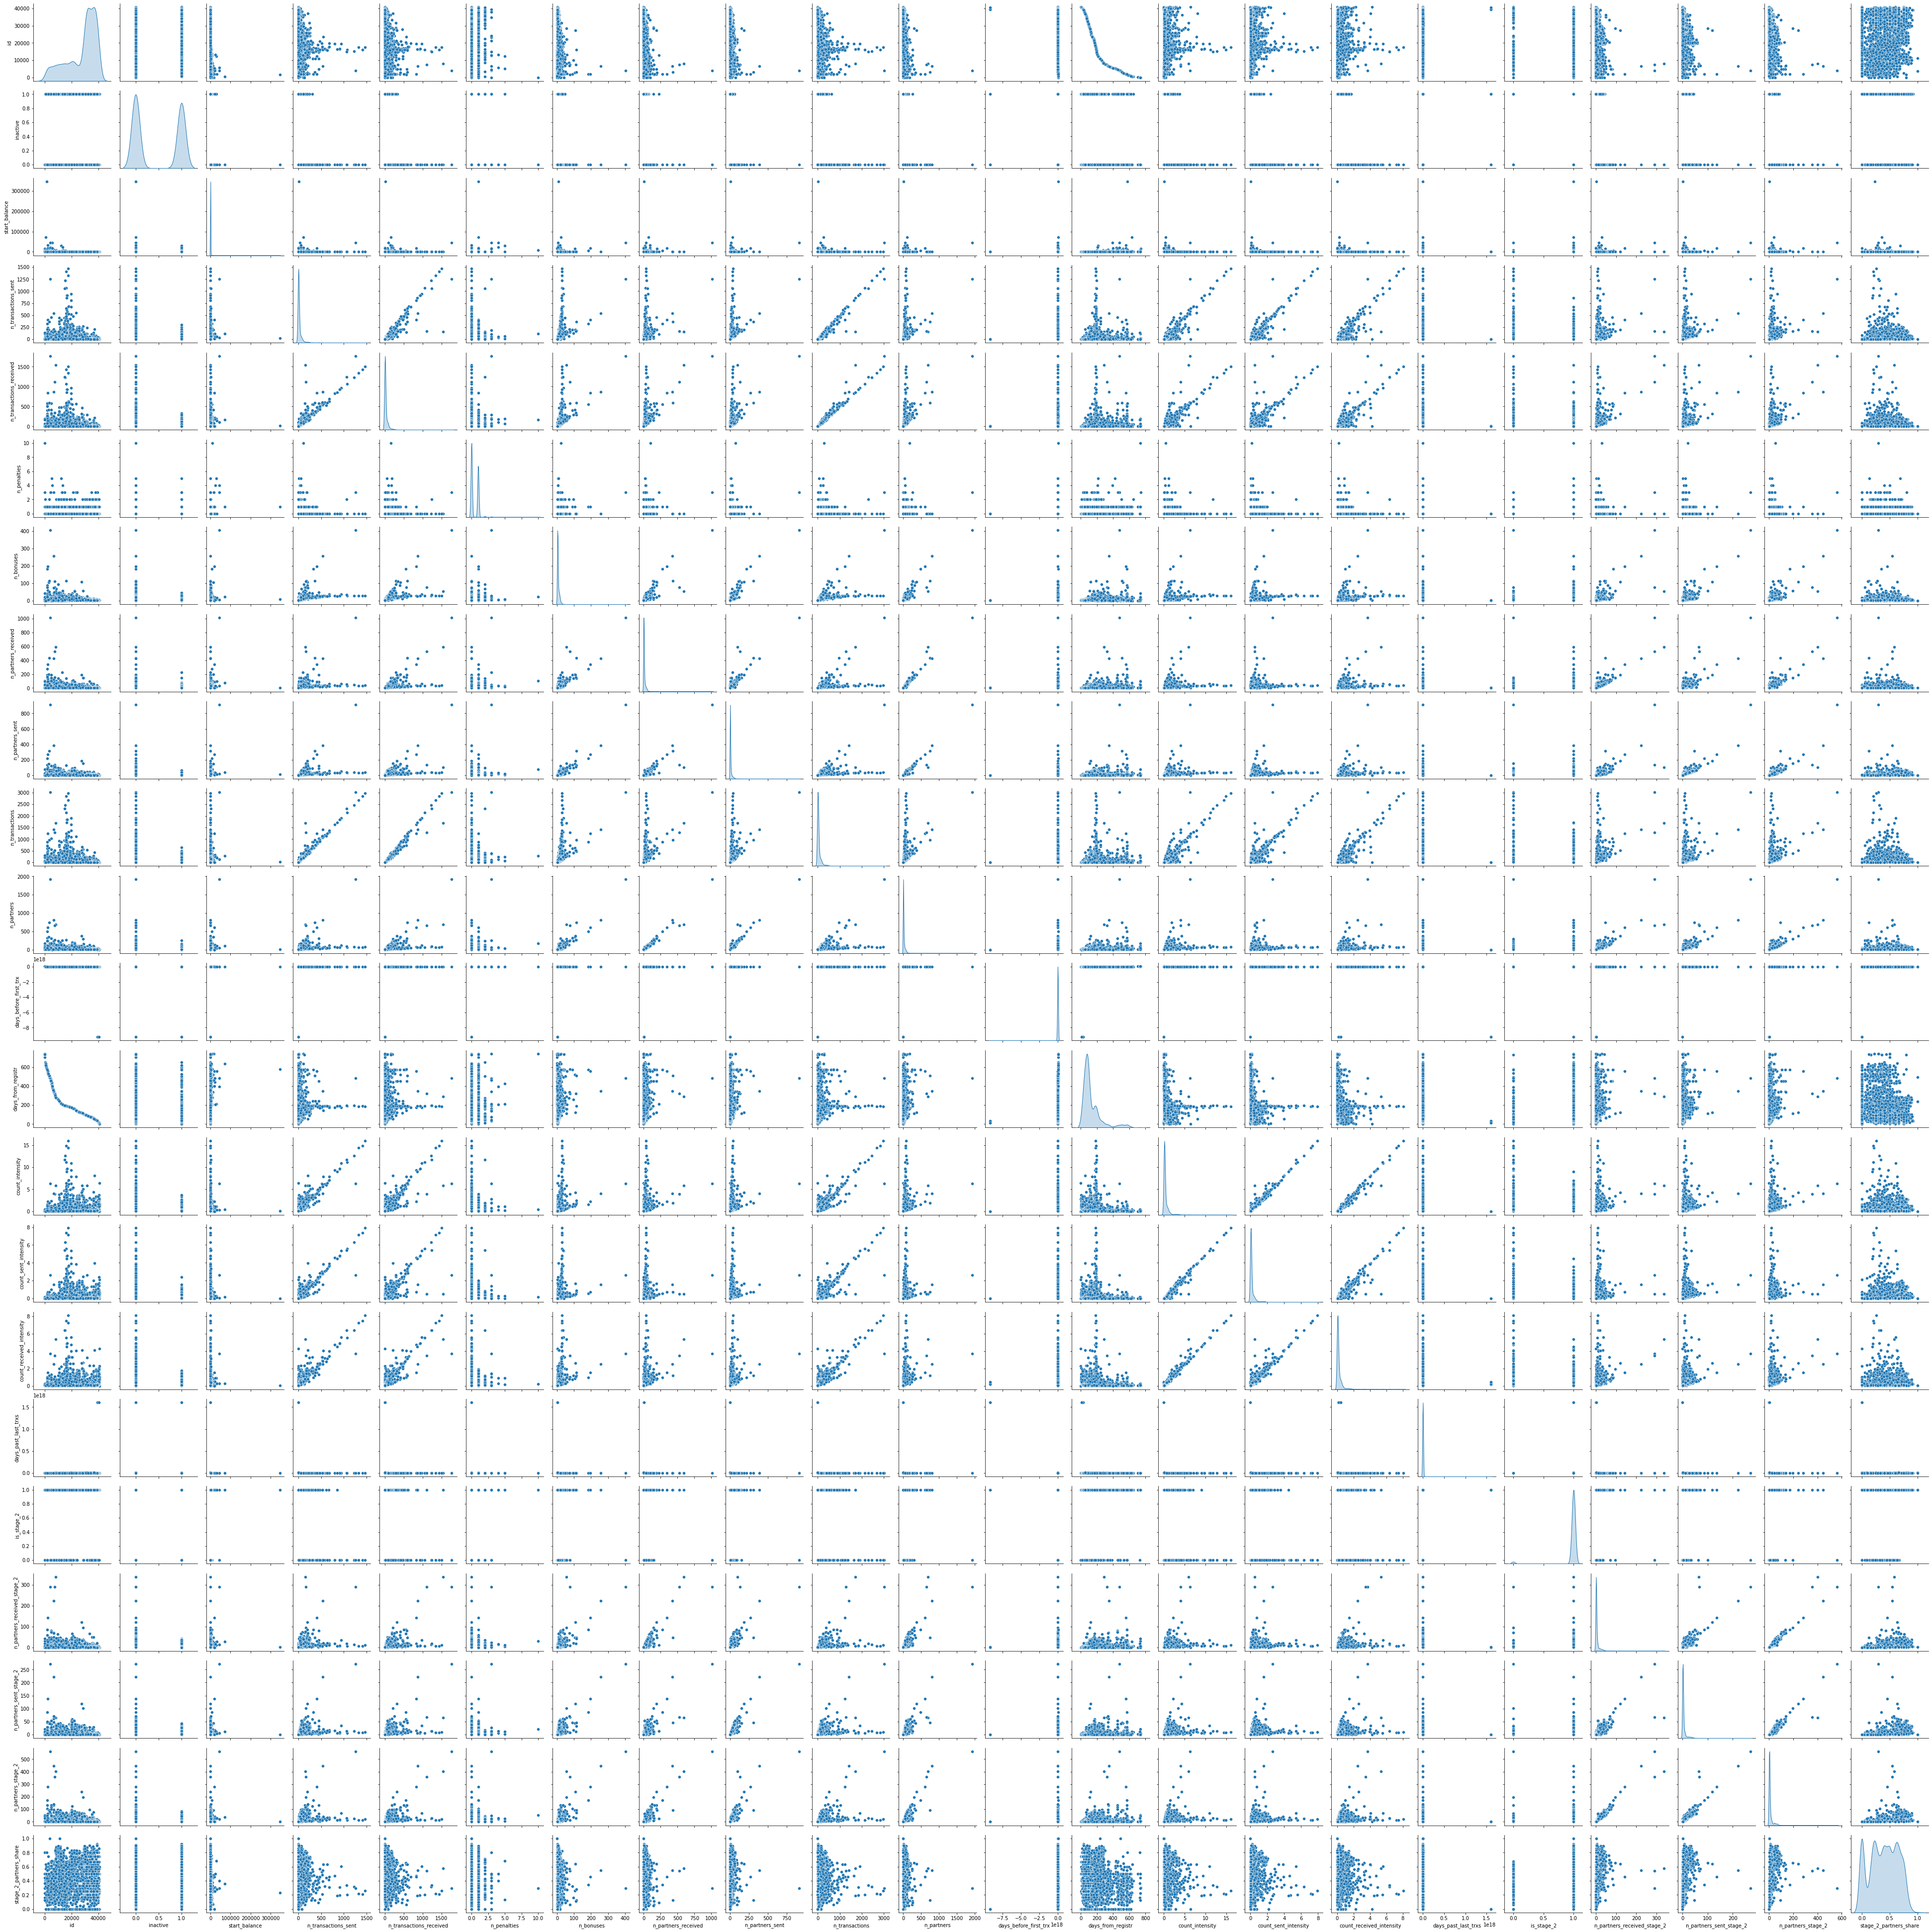

In [18]:
sns.pairplot(data, diag_kind="kde")

In [19]:
#for i in tmp['scatter_num']:
    #i.show()

## Categorical

In [37]:
cols_cat = [
    'inactive', 'account_type', 'area_name', 'business_type', 'start_balance'
]
data_cat = data.loc[:, cols_cat]
data_cat['inactive'] = data_cat['inactive'].astype(str)
tmp2 = show_basic_plots(data_cat)

In [38]:
for i in tmp2['dist_cat']: 
    i.show()

- almost 50/50 distrib in inactive
- all accounts are individual
- too many categories in area name: restrict to kinango, mukuru, misc nairobi, nyanza, other
- too many categories in business type: unite government, health, education; other,faith,savings,environment

In [ ]:
#for i in tmp2['dist_mlt_cat']: 
    #i.show()

## Mix

In [41]:
for i in tmp['violin_mix']:
    i.show()

In [45]:
sum(data.start_balance >0)

1063

## Conclusion

## Correlation analysis

In [ ]:
#corr_heatmap(data)